In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)

In [2]:
dataset = pd.read_csv("Data.csv")

In [3]:
dataset.head(5)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [83]:
dataset.shape

(58592, 38)

In [4]:
# check duplicate customer 
dataset.duplicated().sum()

0

In [5]:
# check missing data
dataset.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [6]:
# check information about the dataset  
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [7]:
dataset.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [8]:
dataset['max_torque'].value_counts()

max_torque
113Nm@4400rpm     17796
60Nm@3500rpm      14948
250Nm@2750rpm     14018
82.1Nm@3400rpm     4173
91Nm@4250rpm       2373
200Nm@1750rpm      2114
200Nm@3000rpm      1598
85Nm@3000rpm       1209
170Nm@4000rpm       363
Name: count, dtype: int64

In [9]:
dataset['max_power'].value_counts()

max_power
88.50bhp@6000rpm     17796
40.36bhp@6000rpm     14948
113.45bhp@4000rpm    14018
55.92bhp@5300rpm      4173
67.06bhp@5500rpm      2373
97.89bhp@3600rpm      2114
88.77bhp@4000rpm      1598
61.68bhp@6000rpm      1209
118.36bhp@5500rpm      363
Name: count, dtype: int64

## Feature Enginnering 

In [10]:
dataset["max_power"]=dataset["max_power"].apply(lambda x:x.split('bhp')[0]).astype(float)

In [11]:
dataset["max_torque"]=dataset["max_torque"].apply(lambda x:x.split('Nm')[0]).astype(float)

In [12]:
# Converting bhp to kW
# 1kW=1bhp*0.7457
dataset["max_power"]=dataset["max_power"]*0.7457

In [13]:
dataset['max_power'].value_counts()

max_power
65.994450    17796
30.096452    14948
84.599665    14018
41.699544     4173
50.006642     2373
72.996573     2114
66.195789     1598
45.994776     1209
88.261052      363
Name: count, dtype: int64

In [14]:
# Torque-Power Ratio(TPR)
# TPR=max torque(Nm)/Max Power(kW)

dataset["Torque_Power_Ratio"]=dataset["max_torque"]/dataset["max_power"]

In [15]:
dataset.sample(5)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Torque_Power_Ratio
9251,ID09252,1.063803,0.01,0.519231,C2,27003,5,C1,M9,Diesel,200.0,72.996573,i-DTEC,2,No,Yes,No,Yes,Yes,Drum,1498,4,Manual,5,Electric,4.9,3995,1695,1501,1051,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0,2.739855
16382,ID16383,0.713453,0.12,0.442308,C5,34738,3,C2,M4,Diesel,250.0,84.599665,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.2,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0,2.955094
35089,ID35090,0.666394,0.07,0.490385,C10,73430,1,B2,M6,Petrol,113.0,65.994450,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0,1.712265
27328,ID27329,1.184187,0.11,0.884615,C4,21622,1,B2,M6,Petrol,113.0,65.994450,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0,1.712265
42041,ID42042,1.039937,0.02,0.442308,C8,8794,3,C2,M4,Diesel,250.0,84.599665,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.2,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0,2.955094


In [16]:
dataset['Torque_Power_Ratio'].value_counts()

Torque_Power_Ratio
1.712265    17796
1.993590    14948
2.955094    14018
1.968846     4173
1.819758     2373
2.739855     2114
3.021340     1598
1.848036     1209
1.926104      363
Name: count, dtype: int64

In [17]:
dataset['length'].value_counts()

length
3445    14948
4300    14018
3845    13776
3990     4538
3655     4173
3995     3194
3731     2373
3675     1209
3993      363
Name: count, dtype: int64

In [18]:
dataset['width'].value_counts()

width
1515    14948
1735    14856
1790    14018
1620     4173
1745     2940
1579     2373
1695     2114
1755     1598
1475     1209
1811      363
Name: count, dtype: int64

In [19]:
# Weighted Volume = length*width*hieght*gross weight

dataset["Weighted_Volume"]=dataset["length"]*dataset["width"]*dataset["height"]*dataset["gross_weight"]

In [20]:
# polulation >=30k--Premium areas
# 30k < polulation >10k--Plus areas
#  polulation <= 10k--Basic areas

dataset['Areas']=np.where(dataset['population_density']>=30000,'Premium areas',np.where(dataset['population_density']<=10000,'Basic areas','Plus areas'))

In [21]:
dataset['Areas'].value_counts()

Areas
Basic areas      32835
Plus areas       13300
Premium areas    12457
Name: count, dtype: int64

In [22]:
dataset['airbags']=dataset['airbags'].astype(object)
dataset['make']=dataset['make'].astype(object)
dataset['cylinder']=dataset['cylinder'].astype(object)
dataset['gear_box']=dataset['gear_box'].astype(object)
dataset['ncap_rating']=dataset['ncap_rating'].astype(object)

In [23]:
dataset1=dataset.copy()

In [24]:
#Droppinbg irrevalant features
dataset1.drop(columns=['policy_id', 'area_cluster','population_density','max_torque','max_power','length','width','height','gross_weight',], axis=1,inplace=True)

## EDA

<Axes: ylabel='count'>

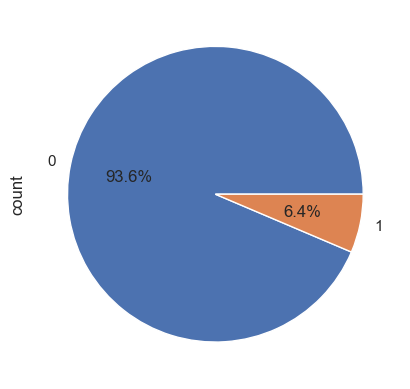

In [25]:
dataset['is_claim'].value_counts().plot(kind='pie', autopct='%1.1f%%')

### 6.4% Data is claim i.e there imbalance in dataset

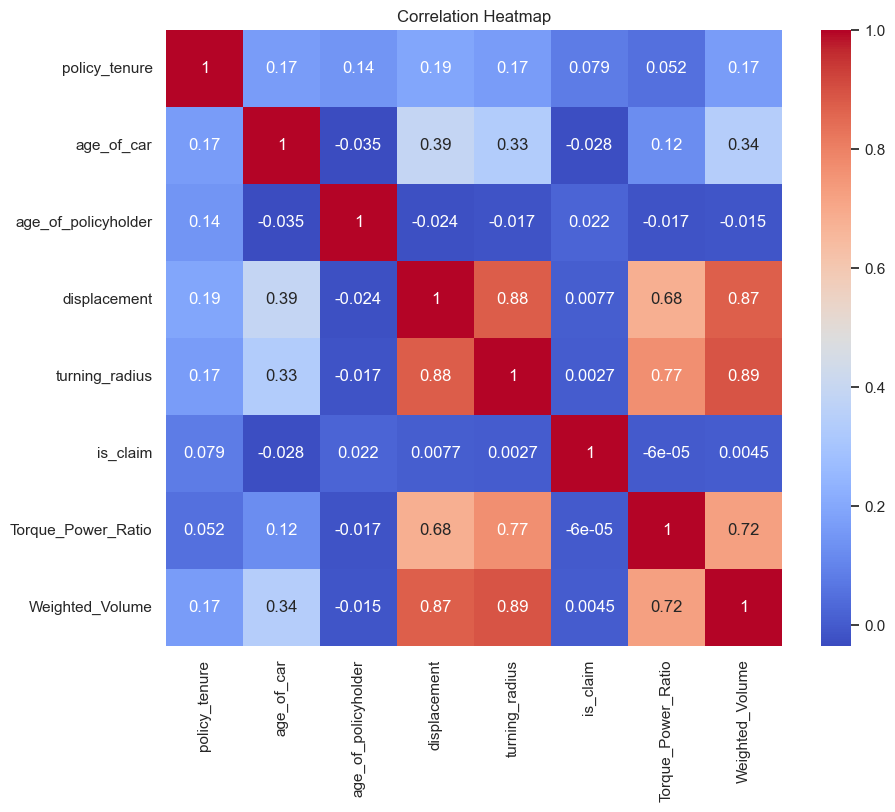

Highly Correlated Features:
('displacement', 'turning_radius', 0.8754071279308127)
('displacement', 'Weighted_Volume', 0.8711148297744882)
('turning_radius', 'Torque_Power_Ratio', 0.7663115534562824)
('turning_radius', 'Weighted_Volume', 0.8941487271577548)
('Torque_Power_Ratio', 'Weighted_Volume', 0.7214820191681449)


In [26]:
numeric_cols = dataset1.select_dtypes(include=[int, float])

# Calculate correlation matrix
corr_matrix = numeric_cols.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

# Identify highly correlated features (abs(corr) > 0.7)
high_corr_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr_features.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Print highly correlated features
print("Highly Correlated Features:")
for feature in high_corr_features:
    print(feature)


Text(0.5, 1.0, 'Area Cluster vs Claim')

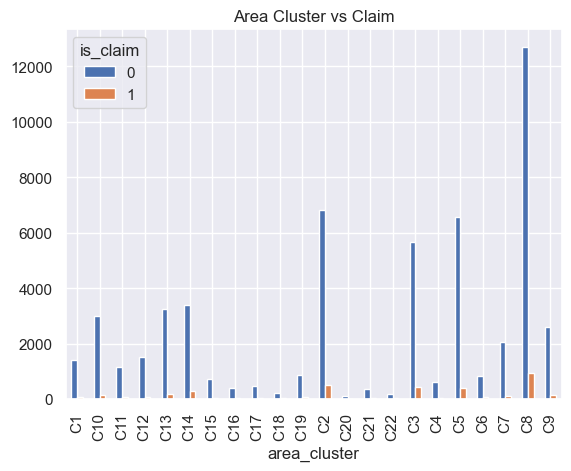

In [27]:
# Relation between area_cluster vs is_claim
gender_wise = pd.crosstab(dataset['area_cluster'], dataset['is_claim'])
gender_wise.plot(kind='bar')
plt.title("Area Cluster vs Claim")

### Highest claim is done in C8 Cluster

<Axes: xlabel='area_cluster'>

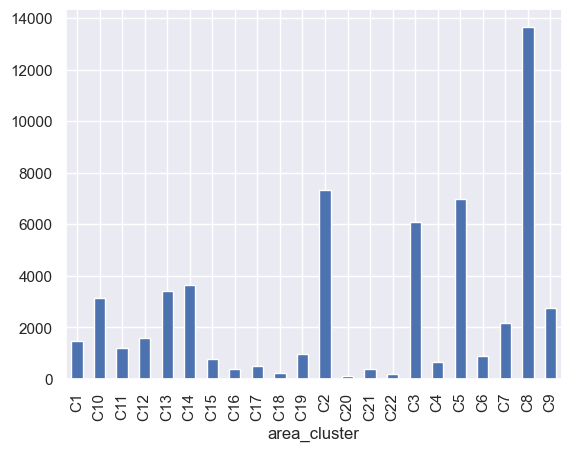

In [28]:
dataset.groupby(['area_cluster'])['population_density'].count().plot(kind='bar')

### Highest population is in C8 and least in C20 Cluster

<Figure size 1000x600 with 0 Axes>

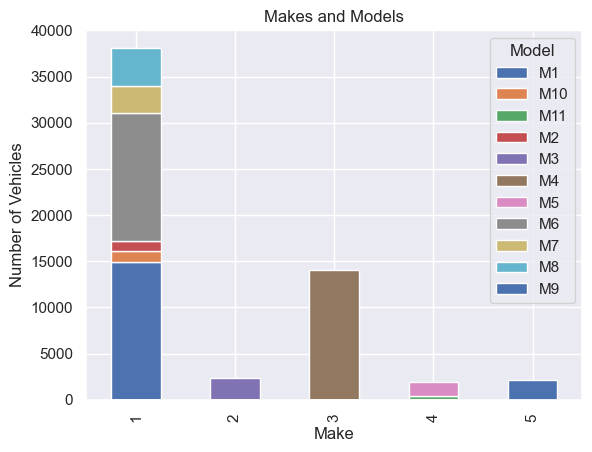

In [29]:
# Group by make and model, and count the number of vehicles
counts = dataset.groupby(['make', 'model']).size().reset_index(name='count')

# Pivot the data to create a stacked bar chart
pivot = counts.pivot(index='make', columns='model', values='count')

# Create the stacked bar chart
plt.figure(figsize=(10, 6))
pivot.plot(kind='bar', stacked=True)

# Customize the plot
plt.xlabel('Make')
plt.ylabel('Number of Vehicles')
plt.title('Makes and Models')
plt.legend(title='Model')
plt.show()

### Make 1 has varieties of models

In [30]:
#df=dataset.groupby(['population_density']).max().sort_values(by='population_density',ascending=False)
dataset.groupby(['engine_type','fuel_type'])['fuel_type'].count()

engine_type                fuel_type
1.0 SCe                    Petrol        2373
1.2 L K Series Engine      Petrol        2940
1.2 L K12N Dualjet         Petrol        1080
1.5 L U2 CRDi              Diesel       14018
1.5 Turbocharged Revotorq  Diesel        1598
1.5 Turbocharged Revotron  Petrol         363
F8D Petrol Engine          CNG          14948
G12B                       CNG           1209
K Series Dual jet          Petrol       13776
K10C                       CNG           4173
i-DTEC                     Diesel        2114
Name: fuel_type, dtype: int64

In [31]:
dataset.sample(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Torque_Power_Ratio,Weighted_Volume,Areas
10645,ID10646,1.012921,0.05,0.384615,C3,4076,3,C2,M4,Diesel,250.0,84.599665,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.2,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0,2.955094,21645503400000,Basic areas
35512,ID35513,0.102610,0.11,0.500000,C7,6112,1,B2,M6,Petrol,113.0,65.994450,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0,1.712265,13626004241250,Basic areas


In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  object 
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  float64
 11  max_power                         58592 non-null  float64
 12  engi

In [33]:
#Droppinbg irrevalant features
dataset.drop(columns=['policy_id', 'area_cluster','population_density','max_torque','max_power','length','width','height','gross_weight',], axis=1,inplace=True)

## Detect Outlier using Boxplot method

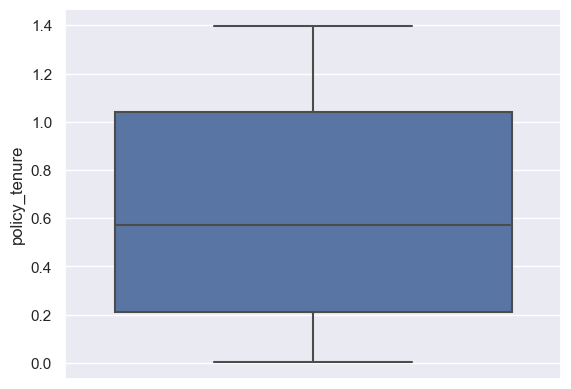

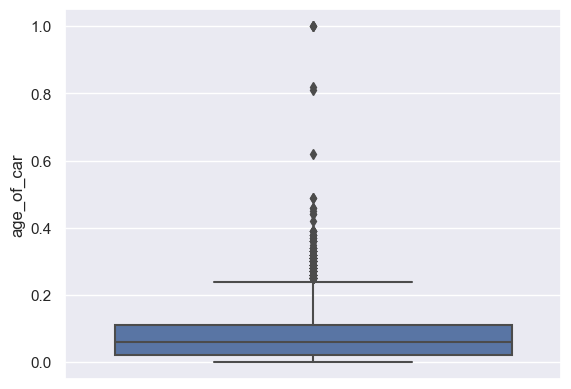

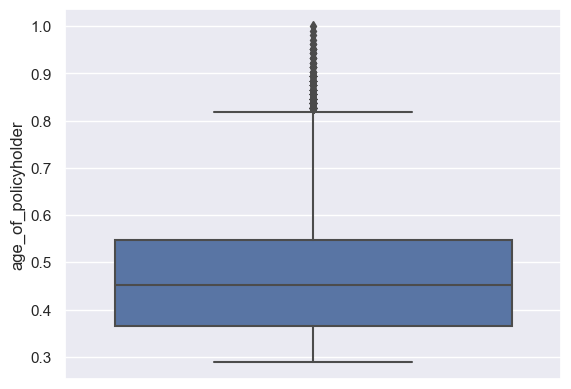

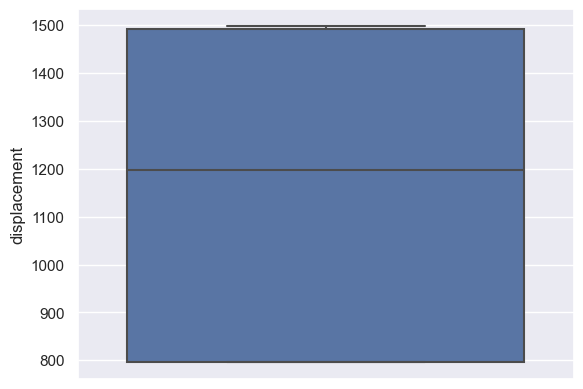

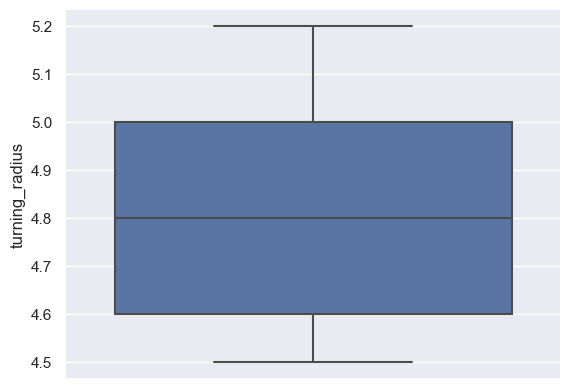

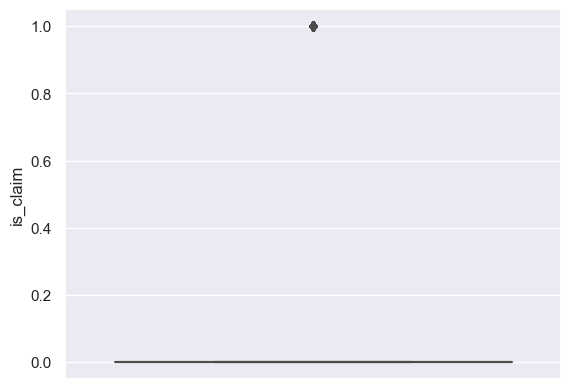

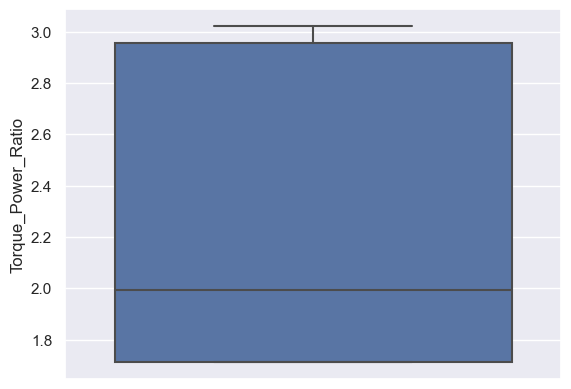

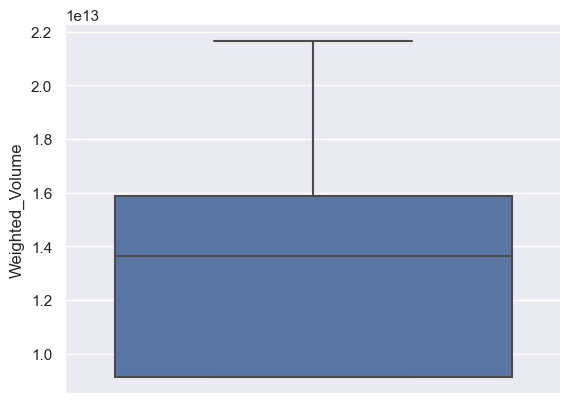

In [34]:
## Outliers detection

def boxplots(col):
    sns.boxplot(y=col, data=dataset)
    plt.show()
    
for i in list(dataset.select_dtypes(exclude=["object"]).columns)[0:]:
    boxplots(i)

### from above boxplot only 2 feature has outlier i.e age_of_car, age_of_policyholder.

## Will treat by using IQR Technique

In [35]:
def outlierCapping(col):
    # Finding the IQR
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    print("Column--",col)
    print("Percentile25 :", Q1)
    print("Percentile75 :", Q3)
    print("InterQuartileRange :", IQR)

    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    print("Upper Limit :", upper_limit)
    print("Lower Limit :", lower_limit)
    print("#############################")
    dataset[col] = np.where(dataset[col] > upper_limit,
                                             upper_limit,
                                              np.where(dataset[col] < lower_limit,
                                                       lower_limit, 
                                                      dataset[col]))


In [36]:
col=['age_of_car', 'age_of_policyholder']
for i in col:
    outlierCapping(i)

Column-- age_of_car
Percentile25 : 0.02
Percentile75 : 0.11
InterQuartileRange : 0.09
Upper Limit : 0.245
Lower Limit : -0.115
#############################
Column-- age_of_policyholder
Percentile25 : 0.365384615384615
Percentile75 : 0.548076923076923
InterQuartileRange : 0.18269230769230804
Upper Limit : 0.822115384615385
Lower Limit : 0.09134615384615291
#############################


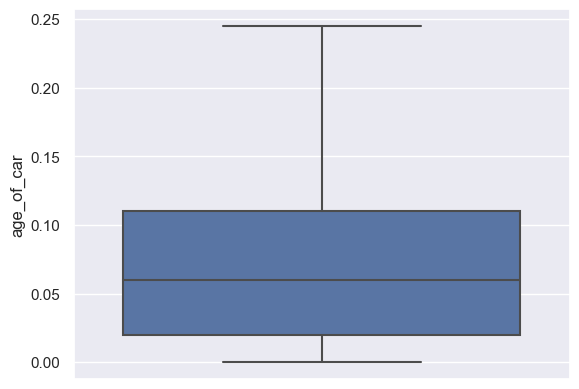

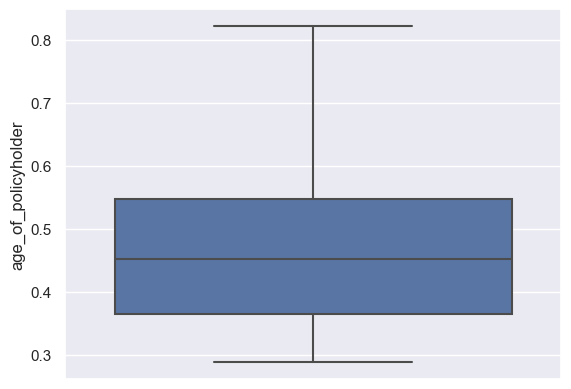

In [37]:
col=['age_of_car', 'age_of_policyholder']
for i in col:
    sns.boxplot(y=i,data=dataset)
    plt.show()


In [38]:
x=dataset.drop(columns=['is_claim'])
y=dataset['is_claim']

In [39]:
# Define column transformer for preprocessing
categorical_feature = x.select_dtypes(include=['object']).columns
numerical_feature = x.select_dtypes(include=['int64','float64']).columns


### Statiscal Test

In [40]:
# correlation Test
from scipy.stats import pearsonr
correlations = {}
for col in numerical_feature:
    corr, _ = pearsonr(x[col], y)
    correlations[col] = corr

In [41]:
correlations

{'policy_tenure': 0.07874744763543114,
 'age_of_car': -0.028175397046177875,
 'age_of_policyholder': 0.022317844000088228,
 'displacement': 0.007677847692265216,
 'turning_radius': 0.0027242229291588862,
 'Torque_Power_Ratio': -6.022624079212173e-05,
 'Weighted_Volume': 0.004548788922249915}

In [42]:
# ANOVA Test p<=0.05
from scipy.stats import f_oneway
anova_results = {}
for col in categorical_feature:
    categories = x[col].unique()
    groups = [y[x[col]==category] for category in categories]
    f_val, p_val = f_oneway(*groups)
    anova_results[col] = (f_val, p_val)

print("\nANOVA Test:")
for key, value in anova_results.items():
    print(f"{key}: F = {value[0]:.4f}, p-value = {value[1]:.4f}")


ANOVA Test:
make: F = 1.1060, p-value = 0.3517
segment: F = 2.5211, p-value = 0.0274
model: F = 1.9978, p-value = 0.0295
fuel_type: F = 2.8799, p-value = 0.0561
engine_type: F = 1.9978, p-value = 0.0295
airbags: F = 0.3105, p-value = 0.7331
is_esc: F = 0.5255, p-value = 0.4685
is_adjustable_steering: F = 11.3494, p-value = 0.0008
is_tpms: F = 0.0290, p-value = 0.8649
is_parking_sensors: F = 4.1535, p-value = 0.0416
is_parking_camera: F = 0.0445, p-value = 0.8330
rear_brakes_type: F = 0.0290, p-value = 0.8649
cylinder: F = 10.5751, p-value = 0.0011
transmission_type: F = 0.0238, p-value = 0.8774
gear_box: F = 0.0237, p-value = 0.8778
steering_type: F = 2.8682, p-value = 0.0568
is_front_fog_lights: F = 8.1936, p-value = 0.0042
is_rear_window_wiper: F = 0.4117, p-value = 0.5211
is_rear_window_washer: F = 0.4117, p-value = 0.5211
is_rear_window_defogger: F = 0.3925, p-value = 0.5310
is_brake_assist: F = 6.9529, p-value = 0.0084
is_power_door_locks: F = 2.5813, p-value = 0.1081
is_central_

In [43]:
# Mutual information-0 to 1
from sklearn.feature_selection import mutual_info_regression
mutual_score = mutual_info_regression(x.select_dtypes(include=['int64','float64']), y, random_state=42)
mutual_score = pd.Series(mutual_score, name='Mutual Score', index= numerical_feature)
mutual_score = mutual_score.sort_values(ascending=False)
print('\nMutual Information Scores:')
print(mutual_score)


Mutual Information Scores:
displacement           0.004615
turning_radius         0.003163
policy_tenure          0.003077
age_of_car             0.000000
age_of_policyholder    0.000000
Torque_Power_Ratio     0.000000
Weighted_Volume        0.000000
Name: Mutual Score, dtype: float64


In [44]:
# Variance Inflation Factor >10
from statsmodels.stats.outliers_influence import variance_inflation_factor
x1 = x.select_dtypes(include=[np.number])
vif_data = pd.DataFrame()
vif_data['feature'] = x1.columns
vif_data['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(len(x1.columns))]
print(vif_data)

               feature        VIF
0        policy_tenure   1.086491
1           age_of_car   1.272890
2  age_of_policyholder   1.019654
3         displacement   4.810991
4       turning_radius   0.140895
5   Torque_Power_Ratio   2.382189
6      Weighted_Volume  48.280746


## Handling Char/Object value

In [45]:
for col in categorical_feature:
    x = pd.get_dummies(x, columns=[col],drop_first=True,dtype='int64')    

In [46]:
# Feature Importance from RandomForest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x, y)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("\nFeature Importance from Random Forest")
for i in range(x.shape[1]):
    print(f"{x.columns[indices[i]]}: {importances[indices[i]]:.4f}")


Feature Importance from Random Forest
policy_tenure: 0.5437
age_of_policyholder: 0.1978
age_of_car: 0.1107
Areas_Plus areas: 0.0268
Areas_Premium areas: 0.0242
Weighted_Volume: 0.0082
displacement: 0.0051
Torque_Power_Ratio: 0.0047
turning_radius: 0.0046
model_M7: 0.0028
engine_type_1.2 L K Series Engine: 0.0028
engine_type_K Series Dual jet: 0.0027
model_M6: 0.0026
segment_B2: 0.0026
ncap_rating_2: 0.0024
steering_type_Power: 0.0023
transmission_type_Manual: 0.0021
is_parking_camera_Yes: 0.0021
fuel_type_Petrol: 0.0020
is_day_night_rear_view_mirror_Yes: 0.0019
is_rear_window_defogger_Yes: 0.0019
airbags_2: 0.0017
is_brake_assist_Yes: 0.0016
is_esc_Yes: 0.0015
segment_C1: 0.0015
model_M2: 0.0015
engine_type_1.2 L K12N Dualjet: 0.0014
fuel_type_Diesel: 0.0014
is_rear_window_washer_Yes: 0.0013
is_rear_window_wiper_Yes: 0.0013
cylinder_4: 0.0013
is_front_fog_lights_Yes: 0.0012
engine_type_F8D Petrol Engine: 0.0012
engine_type_K10C: 0.0012
airbags_6: 0.0012
segment_B1: 0.0012
is_driver_se

In [47]:
# Feature Importance from GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(x, y)
importances = gb_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("\nFeature Importance from Gradient Boosting")
for i in range(x.shape[1]):
    print(f"{x.columns[indices[i]]}: {importances[indices[i]]:.4f}")


Feature Importance from Gradient Boosting
policy_tenure: 0.4940
age_of_car: 0.2477
Weighted_Volume: 0.0809
age_of_policyholder: 0.0540
engine_type_F8D Petrol Engine: 0.0422
displacement: 0.0151
cylinder_4: 0.0122
Areas_Premium areas: 0.0071
segment_B1: 0.0050
Areas_Plus areas: 0.0049
model_M2: 0.0041
turning_radius: 0.0038
engine_type_1.2 L K12N Dualjet: 0.0031
engine_type_K10C: 0.0030
Torque_Power_Ratio: 0.0028
segment_B2: 0.0027
model_M5: 0.0025
is_ecw_Yes: 0.0023
is_parking_sensors_Yes: 0.0022
is_speed_alert_Yes: 0.0022
engine_type_1.5 Turbocharged Revotorq: 0.0020
is_driver_seat_height_adjustable_Yes: 0.0011
model_M3: 0.0010
airbags_6: 0.0009
is_central_locking_Yes: 0.0007
model_M7: 0.0006
engine_type_1.2 L K Series Engine: 0.0005
is_rear_window_wiper_Yes: 0.0004
steering_type_Power: 0.0003
make_5: 0.0003
engine_type_K Series Dual jet: 0.0003
engine_type_1.5 Turbocharged Revotron: 0.0002
model_M11: 0.0001
is_front_fog_lights_Yes: 0.0001
model_M6: 0.0000
airbags_2: 0.0000
model_M10

## Handling Imbalance data


In [48]:
import imblearn
from imblearn.over_sampling import SMOTE
smote= SMOTE()
x_smote, y_smote = smote.fit_resample(x,y)
print("Original-",y.value_counts())
print("After SMOTE-",y_smote.value_counts())

Original- is_claim
0    54844
1     3748
Name: count, dtype: int64
After SMOTE- is_claim
0    54844
1    54844
Name: count, dtype: int64


<Axes: ylabel='count'>

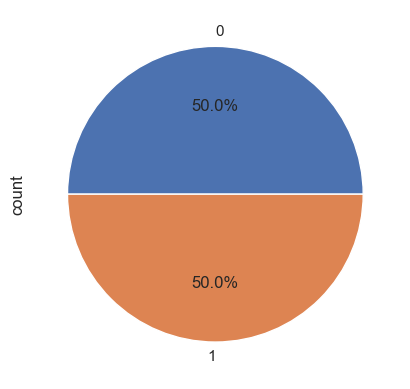

In [49]:
y_smote.value_counts().plot(kind='pie', autopct='%1.1f%%')

## Now data is Balanaced using SMOTE Technique

### Split Train and Test data

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=101,stratify=y_smote)

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [52]:
x_train=pd.DataFrame(x_train,columns=x_smote.columns)
x_train.head()

,policy_tenure,age_of_car,age_of_policyholder,displacement,turning_radius,Torque_Power_Ratio,Weighted_Volume,make_2,make_3,make_4,make_5,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_Diesel,fuel_type_Petrol,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,airbags_2,airbags_6,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,rear_brakes_type_Drum,cylinder_4,transmission_type_Manual,gear_box_6,steering_type_Manual,steering_type_Power,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes,ncap_rating_2,ncap_rating_3,ncap_rating_4,ncap_rating_5,Areas_Plus areas,Areas_Premium areas
0,0.636228,-1.256807,0.472004,-1.390100,-1.115514,-0.366153,-1.132437,-0.197366,-0.562162,-0.187201,-0.192643,-0.269725,-0.688367,-0.253945,-0.562162,-0.143313,-0.143313,-0.070501,-0.142316,-0.197366,-0.562162,-0.172547,-0.564093,-0.232305,-0.269725,-0.192643,-0.662194,-0.741692,-0.232305,-0.142316,-0.562162,-0.172547,-0.070501,1.721301,-0.143313,-0.564093,-0.269725,-0.192643,0.672575,-0.641180,-0.679912,-1.269981,-0.562162,0.197366,-0.798604,0.562162,-1.325848,0.731678,-0.569779,-0.143313,0.877014,-1.195548,-0.641180,-0.641180,-0.736899,-1.122508,-1.634064,-1.634064,0.143313,-1.207840,-0.792417,-1.634064,0.070501,-0.760699,-0.562162,-0.192643,-0.187201,2.348910,-0.404466
1,0.752834,0.806125,0.475852,1.232758,1.522985,1.506961,1.585408,-0.197366,1.778846,-0.187201,-0.192643,-0.269725,-0.688367,-0.253945,1.778846,-0.143313,-0.143313,-0.070501,-0.142316,-0.197366,1.778846,-0.172547,-0.564093,-0.232305,-0.269725,-0.192643,1.510131,-0.741692,-0.232305,-0.142316,1.778846,-0.172547,-0.070501,-0.580956,-0.143313,-0.564093,-0.269725,-0.192643,-1.486822,1.559624,1.470778,0.787413,1.778846,0.197366,1.252185,-1.778846,0.754234,-1.366722,1.755066,-0.143313,0.877014,0.836437,1.559624,1.559624,1.357038,0.890862,0.611971,0.611971,0.143313,0.827924,-0.792417,0.611971,0.070501,-0.760699,1.778846,-0.192643,-0.187201,-0.425729,-0.404466
2,0.014479,-1.256807,0.297473,-1.390100,-1.115514,-0.366153,-1.132437,-0.197366,-0.562162,-0.187201,-0.192643,-0.269725,-0.688367,-0.253945,-0.562162,-0.143313,-0.143313,-0.070501,-0.142316,-0.197366,-0.562162,-0.172547,-0.564093,-0.232305,-0.269725,-0.192643,-0.662194,-0.741692,-0.232305,-0.142316,-0.562162,-0.172547,-0.070501,1.721301,-0.143313,-0.564093,-0.269725,-0.192643,0.672575,-0.641180,-0.679912,-1.269981,-0.562162,0.197366,-0.798604,0.562162,-1.325848,0.731678,-0.569779,-0.143313,0.877014,-1.195548,-0.641180,-0.641180,-0.736899,-1.122508,-1.634064,-1.634064,0.143313,-1.207840,-0.792417,-1.634064,0.070501,-0.760699,-0.562162,-0.192643,-0.187201,-0.425729,-0.404466
3,-0.571138,1.374216,-1.209508,0.118890,-0.236014,-0.914205,-0.155045,-0.197366,-0.562162,-0.187201,-0.192643,-0.269725,1.452714,-0.253945,-0.562162,-0.143313,-0.143313,-0.070501,-0.142316,-0.197366,-0.562162,-0.172547,1.772757,-0.232305,-0.269725,-0.192643,-0.662194,1.348269,-0.232305,-0.142316,-0.562162,-0.172547,-0.070501,-0.580956,-0.143313,1.772757,-0.269725,-0.192643,0.672575,-0.641180,-0.679912,0.787413,-0.562162,0.197366,-0.798604,0.562162,0.754234,0.731678,-0.569779,-0.143313,-1.140233,0.836437,-0.641180,-0.641180,-0.736899,0.890862,0.611971,0.611971,0.143313,0.827924,1.261962,0.611971,0.070501,1.314580,-0.562162,-0.192643,-0.187201,-0.425729,-0.404466
4,1.069983,-0.880946,1.480911,1.232758,1.522985,1.506961,1.585408,-0.197366,1.778846,-0.187201

In [53]:
x_test=pd.DataFrame(x_test,columns=x_smote.columns)
x_test.head()

,policy_tenure,age_of_car,age_of_policyholder,displacement,turning_radius,Torque_Power_Ratio,Weighted_Volume,make_2,make_3,make_4,make_5,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_Diesel,fuel_type_Petrol,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,airbags_2,airbags_6,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,rear_brakes_type_Drum,cylinder_4,transmission_type_Manual,gear_box_6,steering_type_Manual,steering_type_Power,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes,ncap_rating_2,ncap_rating_3,ncap_rating_4,ncap_rating_5,Areas_Plus areas,Areas_Premium areas
0,-1.156895,1.499857,0.503681,0.118890,-0.236014,-0.914205,-0.155045,-0.197366,-0.562162,-0.187201,-0.192643,-0.269725,1.452714,-0.253945,-0.562162,-0.143313,-0.143313,-0.070501,-0.142316,-0.197366,-0.562162,-0.172547,1.772757,-0.232305,-0.269725,-0.192643,-0.662194,1.348269,-0.232305,-0.142316,-0.562162,-0.172547,-0.070501,-0.580956,-0.143313,1.772757,-0.269725,-0.192643,0.672575,-0.641180,-0.679912,0.787413,-0.562162,0.197366,-0.798604,0.562162,0.754234,0.731678,-0.569779,-0.143313,-1.140233,0.836437,-0.641180,-0.641180,-0.736899,0.890862,0.611971,0.611971,0.143313,0.827924,1.261962,0.611971,0.070501,1.314580,-0.562162,-0.192643,-0.187201,-0.425729,-0.404466
1,1.454002,0.622495,-0.284677,1.232758,1.522985,1.506961,1.585408,-0.197366,1.778846,-0.187201,-0.192643,-0.269725,-0.688367,-0.253945,1.778846,-0.143313,-0.143313,-0.070501,-0.142316,-0.197366,1.778846,-0.172547,-0.564093,-0.232305,-0.269725,-0.192643,1.510131,-0.741692,-0.232305,-0.142316,1.778846,-0.172547,-0.070501,-0.580956,-0.143313,-0.564093,-0.269725,-0.192643,-1.486822,1.559624,1.470778,0.787413,1.778846,0.197366,1.252185,-1.778846,0.754234,-1.366722,1.755066,-0.143313,0.877014,0.836437,1.559624,1.559624,1.357038,0.890862,0.611971,0.611971,0.143313,0.827924,-0.792417,0.611971,0.070501,-0.760699,1.778846,-0.192643,-0.187201,-0.425729,-0.404466
2,-1.186557,-0.950109,1.545460,-1.390100,-1.115514,-0.366153,-1.132437,-0.197366,-0.562162,-0.187201,-0.192643,-0.269725,-0.688367,-0.253945,-0.562162,-0.143313,-0.143313,-0.070501,-0.142316,-0.197366,-0.562162,-0.172547,-0.564093,-0.232305,-0.269725,-0.192643,-0.662194,-0.741692,-0.232305,-0.142316,-0.562162,-0.172547,-0.070501,1.721301,-0.143313,-0.564093,-0.269725,-0.192643,0.672575,-0.641180,-0.679912,-1.269981,-0.562162,0.197366,-0.798604,0.562162,-1.325848,0.731678,-0.569779,-0.143313,0.877014,-1.195548,-0.641180,-0.641180,-0.736899,-1.122508,-1.634064,-1.634064,0.143313,-1.207840,-0.792417,-1.634064,0.070501,-0.760699,-0.562162,-0.192643,-0.187201,-0.425729,2.472398
3,1.215334,0.242251,-0.946742,0.118890,-0.016139,-0.914205,0.083640,-0.197366,-0.562162,-0.187201,-0.192643,-0.269725,1.452714,-0.253945,-0.562162,-0.143313,-0.143313,-0.070501,-0.142316,-0.197366,-0.562162,-0.172547,-0.564093,4.304693,-0.269725,-0.192643,-0.662194,1.348269,4.304693,-0.142316,-0.562162,-0.172547,-0.070501,-0.580956,-0.143313,-0.564093,-0.269725,-0.192643,-1.486822,1.559624,1.470778,0.787413,-0.562162,0.197366,1.252185,0.562162,0.754234,-1.366722,-0.569779,-0.143313,-1.140233,0.836437,1.559624,1.559624,1.357038,0.890862,0.611971,0.611971,0.143313,0.827924,1.261962,0.611971,0.070501,-0.760699,-0.562162,-0.192643,-0.187201,-0.425729,-0.404466
4,-0.875273,-0.566821,0.765354,0.118890,-0.236014,-0.914205,-0.155045,-0.197366,-0.562162,-0.187201,-0.192643,

## Model Selection

## Model 1 : AdaBoost

***************************
[[31357 12518]
 [ 9723 34152]]

[[7880 3089]
 [2425 8544]]
***************************
              precision    recall  f1-score   support

           0       0.76      0.71      0.74     43875
           1       0.73      0.78      0.75     43875

    accuracy                           0.75     87750
   macro avg       0.75      0.75      0.75     87750
weighted avg       0.75      0.75      0.75     87750


              precision    recall  f1-score   support

           0       0.76      0.72      0.74     10969
           1       0.73      0.78      0.76     10969

    accuracy                           0.75     21938
   macro avg       0.75      0.75      0.75     21938
weighted avg       0.75      0.75      0.75     21938

***************************
Accuracy Train Score- 0.7465413105413106

Accuracy Test Score- 0.748655301303674


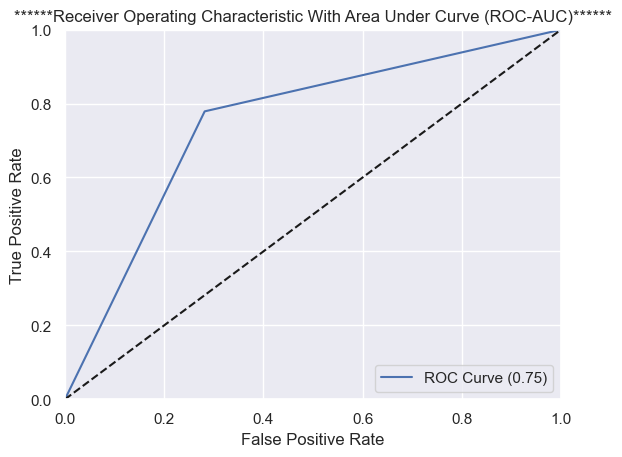

In [54]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred_train_ada = ada.predict(x_train)
y_pred_test_ada = ada.predict(x_test)
print("***************************")
print(confusion_matrix(y_train, y_pred_train_ada))
print()
print(confusion_matrix(y_test, y_pred_test_ada))
print("***************************")
print(classification_report(y_train, y_pred_train_ada))
print()
print(classification_report(y_test, y_pred_test_ada))
print("***************************")
print("Accuracy Train Score-",accuracy_score(y_train, y_pred_train_ada))
print()
print("Accuracy Test Score-",accuracy_score(y_test, y_pred_test_ada))

ada_roc_auc = roc_auc_score(y_test, y_pred_test_ada)
ada_roc_auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_ada)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.2f)" % ada_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("******Receiver Operating Characteristic With Area Under Curve (ROC-AUC)******")
plt.legend(loc='lower right')
plt.show()

## Model 2 - Gradient Boosting Algorithm

***************************
[[40327  3548]
 [ 4764 39111]]

[[10094   875]
 [ 1242  9727]]
***************************
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     43875
           1       0.92      0.89      0.90     43875

    accuracy                           0.91     87750
   macro avg       0.91      0.91      0.91     87750
weighted avg       0.91      0.91      0.91     87750


              precision    recall  f1-score   support

           0       0.89      0.92      0.91     10969
           1       0.92      0.89      0.90     10969

    accuracy                           0.90     21938
   macro avg       0.90      0.90      0.90     21938
weighted avg       0.90      0.90      0.90     21938

***************************
Accuracy Train Score- 0.9052763532763533

Accuracy Test Score- 0.9035007749111131


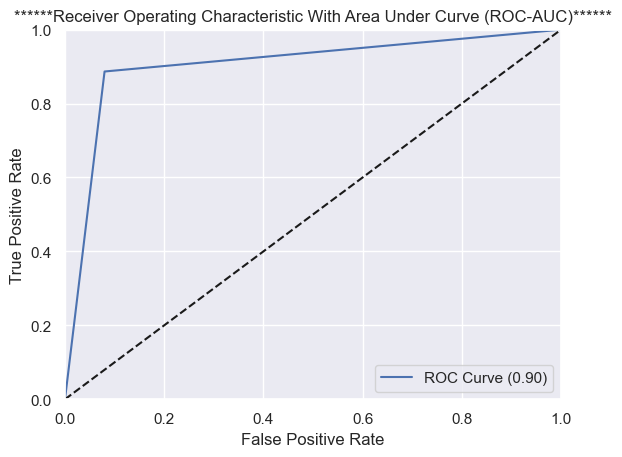

In [55]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier 
gdm = GradientBoostingClassifier()
gdm.fit(x_train, y_train)
y_pred_train_gdm = gdm.predict(x_train)
y_pred_test_gdm = gdm.predict(x_test)
print("***************************")
print(confusion_matrix(y_train, y_pred_train_gdm))
print()
print(confusion_matrix(y_test, y_pred_test_gdm))
print("***************************")
print(classification_report(y_train, y_pred_train_gdm))
print()
print(classification_report(y_test, y_pred_test_gdm))
print("***************************")
print("Accuracy Train Score-",accuracy_score(y_train, y_pred_train_gdm))
print()
print("Accuracy Test Score-",accuracy_score(y_test, y_pred_test_gdm))

gdm_roc_auc = roc_auc_score(y_test, y_pred_test_gdm)
gdm_roc_auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_gdm)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.2f)" % gdm_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("******Receiver Operating Characteristic With Area Under Curve (ROC-AUC)******")
plt.legend(loc='lower right')
plt.show()

## Model 3 - XGBoost Classification

***************************
[[43272   603]
 [ 3940 39935]]

[[10758   211]
 [ 1068  9901]]
***************************
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     43875
           1       0.99      0.91      0.95     43875

    accuracy                           0.95     87750
   macro avg       0.95      0.95      0.95     87750
weighted avg       0.95      0.95      0.95     87750


              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10969
           1       0.98      0.90      0.94     10969

    accuracy                           0.94     21938
   macro avg       0.94      0.94      0.94     21938
weighted avg       0.94      0.94      0.94     21938

***************************
Accuracy Train Score- 0.9482279202279202

Accuracy Test Score- 0.9416993344881028


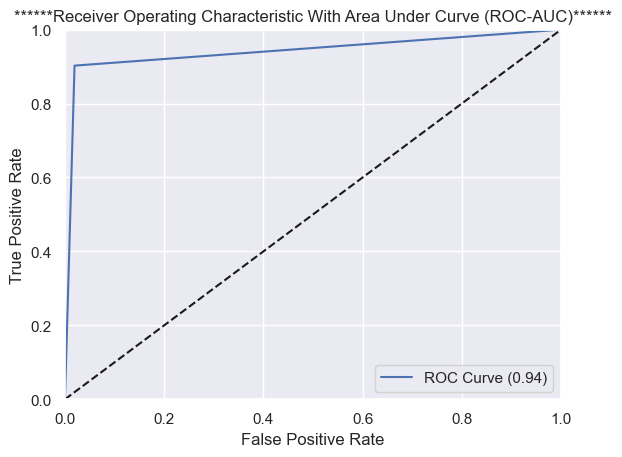

In [56]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)
print("***************************")
print(confusion_matrix(y_train, y_pred_train_xgb))
print()
print(confusion_matrix(y_test, y_pred_test_xgb))
print("***************************")
print(classification_report(y_train, y_pred_train_xgb))
print()
print(classification_report(y_test, y_pred_test_xgb))
print("***************************")
print("Accuracy Train Score-",accuracy_score(y_train, y_pred_train_xgb))
print()
print("Accuracy Test Score-",accuracy_score(y_test, y_pred_test_xgb))

xgb_roc_auc = roc_auc_score(y_test, y_pred_test_xgb)
xgb_roc_auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_xgb)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.2f)" % xgb_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("******Receiver Operating Characteristic With Area Under Curve (ROC-AUC)******")
plt.legend(loc='lower right')
plt.show()

## Model 4 - Bagging Classifier

***************************
[[43826    49]
 [  778 43097]]

[[10496   473]
 [ 1325  9644]]
***************************
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     43875
           1       1.00      0.98      0.99     43875

    accuracy                           0.99     87750
   macro avg       0.99      0.99      0.99     87750
weighted avg       0.99      0.99      0.99     87750


              precision    recall  f1-score   support

           0       0.89      0.96      0.92     10969
           1       0.95      0.88      0.91     10969

    accuracy                           0.92     21938
   macro avg       0.92      0.92      0.92     21938
weighted avg       0.92      0.92      0.92     21938

***************************
Accuracy Train Score- 0.9905754985754985

Accuracy Test Score- 0.918041754034096


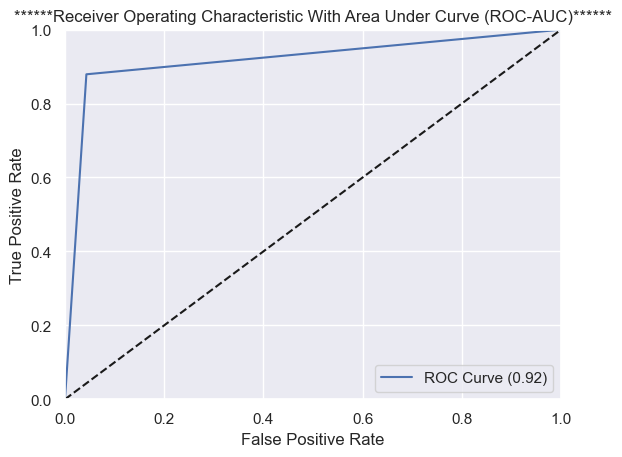

In [57]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()
bagging.fit(x_train, y_train)
y_pred_train_bagging = bagging.predict(x_train)
y_pred_test_bagging = bagging.predict(x_test)
print("***************************")
print(confusion_matrix(y_train, y_pred_train_bagging))
print()
print(confusion_matrix(y_test, y_pred_test_bagging))
print("***************************")
print(classification_report(y_train, y_pred_train_bagging))
print()
print(classification_report(y_test, y_pred_test_bagging))
print("***************************")
print("Accuracy Train Score-",accuracy_score(y_train, y_pred_train_bagging))
print()
print("Accuracy Test Score-",accuracy_score(y_test, y_pred_test_bagging))

bagging_roc_auc = roc_auc_score(y_test, y_pred_test_bagging)
bagging_roc_auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_bagging)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.2f)" % bagging_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("******Receiver Operating Characteristic With Area Under Curve (ROC-AUC)******")
plt.legend(loc='lower right')
plt.show()

## Model 5 - RandomForest Classification

***************************
[[43875     0]
 [    1 43874]]

[[10155   814]
 [ 1436  9533]]
***************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43875
           1       1.00      1.00      1.00     43875

    accuracy                           1.00     87750
   macro avg       1.00      1.00      1.00     87750
weighted avg       1.00      1.00      1.00     87750


              precision    recall  f1-score   support

           0       0.88      0.93      0.90     10969
           1       0.92      0.87      0.89     10969

    accuracy                           0.90     21938
   macro avg       0.90      0.90      0.90     21938
weighted avg       0.90      0.90      0.90     21938

***************************
Accuracy Train Score- 0.999988603988604

Accuracy Test Score- 0.8974382350259823


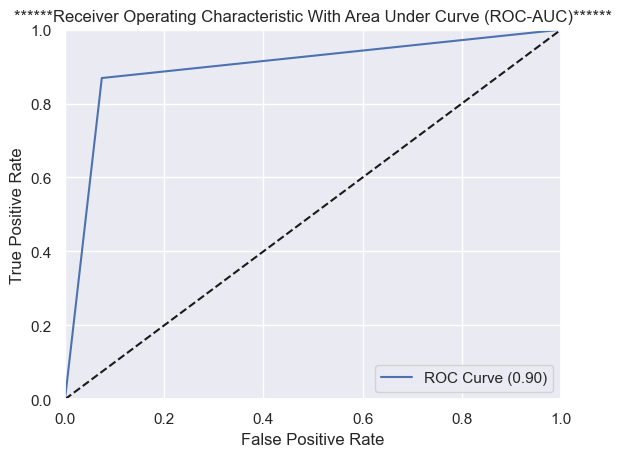

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier()
rfm.fit(x_train, y_train)
y_pred_train_rfm = rfm.predict(x_train)
y_pred_test_rfm = rfm.predict(x_test)
print("***************************")
print(confusion_matrix(y_train, y_pred_train_rfm))
print()
print(confusion_matrix(y_test, y_pred_test_rfm))
print("***************************")
print(classification_report(y_train, y_pred_train_rfm))
print()
print(classification_report(y_test, y_pred_test_rfm))
print("***************************")
print("Accuracy Train Score-",accuracy_score(y_train, y_pred_train_rfm))
print()
print("Accuracy Test Score-",accuracy_score(y_test, y_pred_test_rfm))

rfm_roc_auc = roc_auc_score(y_test, y_pred_test_rfm)
rfm_roc_auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_rfm)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.2f)" % rfm_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("******Receiver Operating Characteristic With Area Under Curve (ROC-AUC)******")
plt.legend(loc='lower right')
plt.show()

## Model 6 - LogisticRegression

***************************
[[24079 19796]
 [ 8864 35011]]

[[6057 4912]
 [2297 8672]]
***************************
              precision    recall  f1-score   support

           0       0.73      0.55      0.63     43875
           1       0.64      0.80      0.71     43875

    accuracy                           0.67     87750
   macro avg       0.68      0.67      0.67     87750
weighted avg       0.68      0.67      0.67     87750


              precision    recall  f1-score   support

           0       0.73      0.55      0.63     10969
           1       0.64      0.79      0.71     10969

    accuracy                           0.67     21938
   macro avg       0.68      0.67      0.67     21938
weighted avg       0.68      0.67      0.67     21938

***************************
Accuracy Train Score- 0.6733903133903134

Accuracy Test Score- 0.6713921050232473


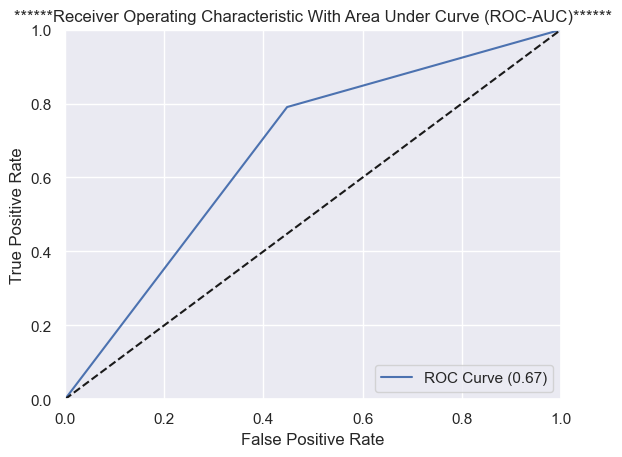

In [59]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression()
lrm.fit(x_train, y_train)
y_pred_train_lrm = lrm.predict(x_train)
y_pred_test_lrm = lrm.predict(x_test)
print("***************************")
print(confusion_matrix(y_train, y_pred_train_lrm))
print()
print(confusion_matrix(y_test, y_pred_test_lrm))
print("***************************")
print(classification_report(y_train, y_pred_train_lrm))
print()
print(classification_report(y_test, y_pred_test_lrm))
print("***************************")
print("Accuracy Train Score-",accuracy_score(y_train, y_pred_train_lrm))
print()
print("Accuracy Test Score-",accuracy_score(y_test, y_pred_test_lrm))

lrm_roc_auc = roc_auc_score(y_test, y_pred_test_lrm)
lrm_roc_auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_lrm)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.2f)" % lrm_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("******Receiver Operating Characteristic With Area Under Curve (ROC-AUC)******")
plt.legend(loc='lower right')
plt.show()

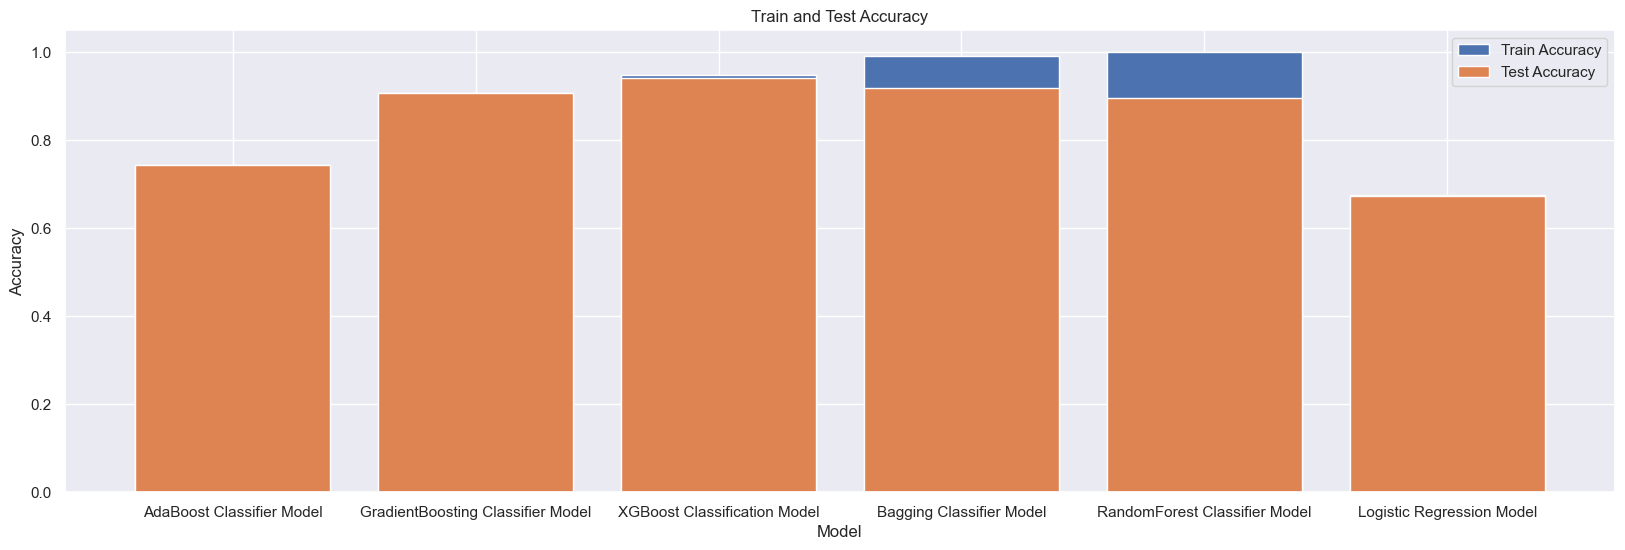

In [85]:
model_names = ['AdaBoost Classifier Model','GradientBoosting Classifier Model','XGBoost Classification Model', 'Bagging Classifier Model', 'RandomForest Classifier Model', 'Logistic Regression Model']
train_accuracy = [0.7438290598290598, 0.9076923076923077, 0.9472136752136752, 0.9908831908831909, 0.9999658119658119, 0.6749059829059829]
test_accuracy = [0.7429574254717841, 0.9079223265566597, 0.9406509253350351, 0.9197283252803355, 0.8952046676998815, 0.673944753395934]



# Create a bar chart
plt.figure(figsize=(20, 6))
plt.bar(model_names, train_accuracy, label='Train Accuracy')
plt.bar(model_names, test_accuracy, label='Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy')
plt.legend()
plt.show()



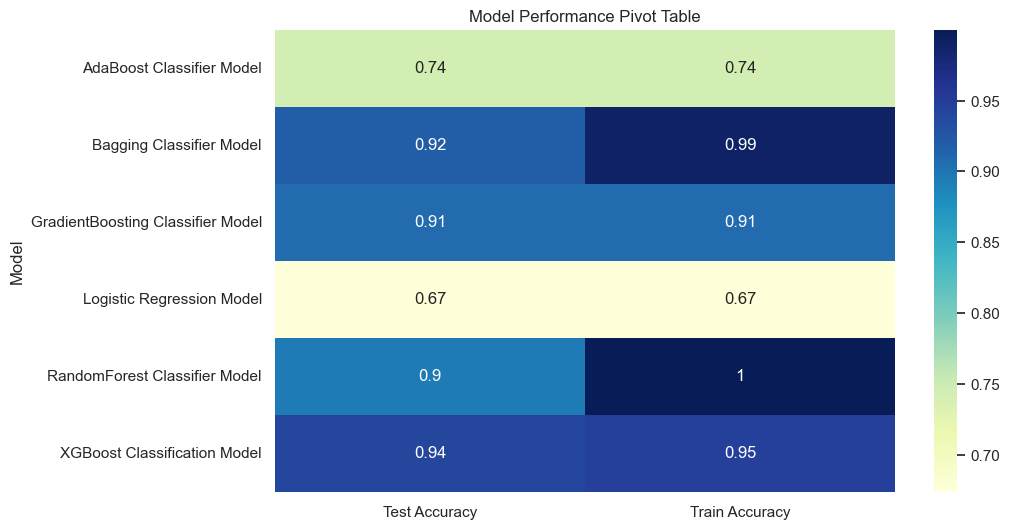

In [78]:
model_names = ['AdaBoost Classifier Model','GradientBoosting Classifier Model','XGBoost Classification Model', 'Bagging Classifier Model', 'RandomForest Classifier Model', 'Logistic Regression Model']
train_accuracy = [0.7438290598290598, 0.9076923076923077, 0.9472136752136752, 0.9908831908831909, 0.9999658119658119, 0.6749059829059829]
test_accuracy = [0.7429574254717841, 0.9079223265566597, 0.9406509253350351, 0.9197283252803355, 0.8952046676998815, 0.673944753395934]

df = pd.DataFrame({
    'Model': model_names,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy
})

pivot_table = pd.pivot_table(df, values=['Train Accuracy', 'Test Accuracy'], index='Model', aggfunc=np.mean)

# create a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title("Model Performance Pivot Table")
plt.show()

## Considering the metrics, XGBoost seems to be a better choice because:

- Its test accuracy is closer to its train accuracy, indicating less overfitting
- Its precision, recall, and F1-score are more balanced between the two classes
- Its weighted average metrics are higher than RandomForest's

## Perform hyperparameter tuning and cross-validation to ensure that the model is not overfitting or underfitting.

In [76]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
model = XGBClassifier()
param_grid = {'max_depth': [3, 5, 7],
              'n_estimators': [100,200],
              'learning_rate': [0.1, 0.5, 1],
              'gamma': [0, 0.1, 0.5]
             }

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation

grid_search = GridSearchCV(model, param_grid, cv=kfold, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Refit the model with the best hyperparameters and evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Best Hyperparameters: {'gamma': 0, 'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200}
Best Accuracy: 0.9435897435897436
Test Accuracy: 0.9427933266478257


## THE END